In [48]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sqlalchemy import create_engine
# import pymysql
# import glob


In [29]:
all_crime = pd.read_csv('all_mossos_crimes.csv')

In [30]:
all_crime.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Resolts', 'Detencions'], inplace=True)

In [31]:
all_crime.head()

,Mes,Nom mes,Any,Regió Policial (RP),Àrea Bàsica Policial (ABP),Títol Codi Penal,Tipus de fet,Coneguts
0,1,gener,2019,RP Metropolitana Nord,ABP Arenys de Mar,De l’homicidi i les seves formes,Homicidi consumat,1.0
1,1,gener,2019,RP Metropolitana Nord,ABP Arenys de Mar,De l’homicidi i les seves formes,Homicidi temptativa,1.0
2,1,gener,2019,RP Metropolitana Nord,ABP Arenys de Mar,De les falsedats,De la usurpació de l'estat civil,2.0
3,1,gener,2019,RP Metropolitana Nord,ABP Arenys de Mar,De les falsedats,Falsedats documentals,2.0
4,1,gener,2019,RP Metropolitana Nord,ABP Arenys de Mar,De les falsedats,Falsificació de moneda i efectes timbrats,2.0


In [32]:
all_crime_barcelona = all_crime[all_crime['Regió Policial (RP)'] == 'RP Metropolitana Barcelona']

In [33]:
all_crime_barcelona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35591 entries, 759 to 172796
Data columns (total 8 columns):
Mes                           35591 non-null int64
Nom mes                       35591 non-null object
Any                           35591 non-null int64
Regió Policial (RP)           35591 non-null object
Àrea Bàsica Policial (ABP)    35591 non-null object
Títol Codi Penal              35591 non-null object
Tipus de fet                  35591 non-null object
Coneguts                      32976 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.4+ MB


In [34]:
all_crime_barcelona = all_crime_barcelona.fillna(0)

In [35]:
all_crime_barcelona.Coneguts = all_crime_barcelona.Coneguts.astype(int)

In [36]:
all_crime_barcelona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35591 entries, 759 to 172796
Data columns (total 8 columns):
Mes                           35591 non-null int64
Nom mes                       35591 non-null object
Any                           35591 non-null int64
Regió Policial (RP)           35591 non-null object
Àrea Bàsica Policial (ABP)    35591 non-null object
Títol Codi Penal              35591 non-null object
Tipus de fet                  35591 non-null object
Coneguts                      35591 non-null int32
dtypes: int32(1), int64(2), object(5)
memory usage: 2.3+ MB


In [38]:
all_crime_barcelona_original = all_crime_barcelona.copy()

In [45]:
all_crime_barcelona.head()

,Mes,Nom mes,Any,Regió Policial (RP),Àrea Bàsica Policial (ABP),Títol Codi Penal,Tipus de fet,Coneguts
759,1,gener,2019,RP Metropolitana Barcelona,ABP Barcelona,De les falsedats,Falsedats documentals,2
760,1,gener,2019,RP Metropolitana Barcelona,ABP Barcelona,De les lesions,Lesions,2
761,1,gener,2019,RP Metropolitana Barcelona,ABP Barcelona,Delictes contra el patrimoni i contra l’ordre ...,Danys,10
762,1,gener,2019,RP Metropolitana Barcelona,ABP Barcelona,Delictes contra el patrimoni i contra l’ordre ...,Estafes,8
763,1,gener,2019,RP Metropolitana Barcelona,ABP Barcelona,Delictes contra el patrimoni i contra l’ordre ...,Furt,123


## Crime evolution per year

In [46]:
##Crime evolution per year
all_crime_barcelona_per_year = all_crime_barcelona.groupby(['Any'], as_index = False).sum()
all_crime_barcelona_per_year.drop(['Mes'], axis=1)

In [51]:
all_crime_barcelona_per_year

,Any,Mes,Coneguts
0,2011,27202,191654
1,2012,27080,183844
2,2013,26868,174274
3,2014,26746,171584
4,2015,25631,171721
5,2016,24721,173284
6,2017,23820,186829
7,2018,23985,219521
8,2019,24133,226150


Text(0.5, 1.0, 'Number of crimes per year')

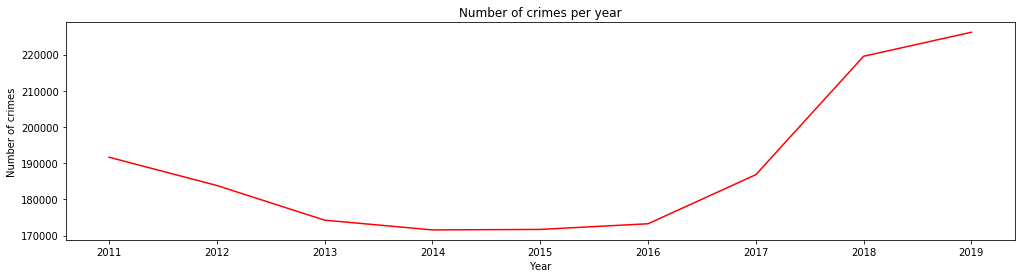

In [50]:
x = all_crime_barcelona_per_year['Any']
y = all_crime_barcelona_per_year['Coneguts']
plt.figure(figsize=(17, 4))
plt.plot(x, y, color='red')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per year')

## Crime evolution per month

In [ ]:
##Crime evolution per month

In [57]:
all_crime_barcelona = all_crime_barcelona_original.copy()

In [58]:
all_crime_barcelona_per_month = all_crime_barcelona.groupby(['Any', 'Mes'], as_index = False).sum()

In [62]:
all_crime_barcelona_per_month_2018_2019 = all_crime_barcelona_per_month[(all_crime_barcelona_per_month['Any'] == 2019) | (all_crime_barcelona_per_month['Any'] == 2018)]

In [63]:
all_crime_barcelona_per_month_2018_2019

,Any,Mes,Coneguts
84,2018,1,16768
85,2018,2,15353
86,2018,3,17271
87,2018,4,17228
88,2018,5,18143
89,2018,6,19094
90,2018,7,20583
91,2018,8,19855
92,2018,9,18821
93,2018,10,19300


In [ ]:
## How to put it together??

## Crime evolution per month in the last three years

Try to see a monthly pattern


In [64]:
crime_per_month_2019 = all_crime_barcelona_per_month[(all_crime_barcelona_per_month['Any'] == 2019)]
crime_per_month_2018 = all_crime_barcelona_per_month[(all_crime_barcelona_per_month['Any'] == 2018)]
crime_per_month_2017 = all_crime_barcelona_per_month[(all_crime_barcelona_per_month['Any'] == 2017)]

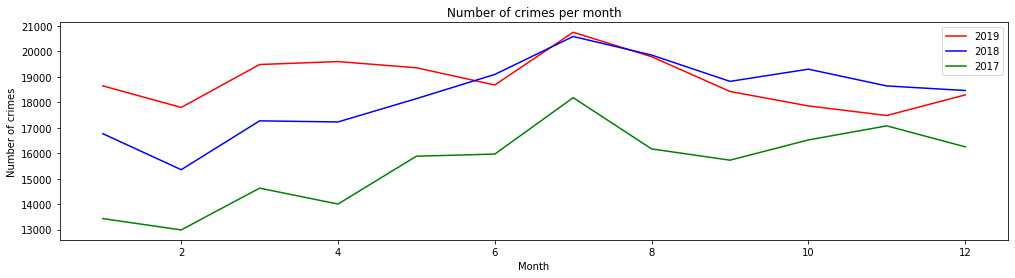

In [66]:
x = all_crime_barcelona_per_year['Any']
y = all_crime_barcelona_per_year['Coneguts']
plt.figure(figsize=(17, 4))
plt.plot(crime_per_month_2019['Mes'], crime_per_month_2019['Coneguts'], color='red', label = 2019)
plt.plot(crime_per_month_2018['Mes'], crime_per_month_2018['Coneguts'], color='blue', label = 2018)
plt.plot(crime_per_month_2017['Mes'], crime_per_month_2017['Coneguts'], color='green', label = 2017)
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per month')
plt.legend()


First conclusion: every year criminality grows during summer months. In fact, in 2018 a similar amount of criminality was reached. And the grouth was even bigger (how to show the grouth percentage?)

## Crime evolution per neighbourhood in the last 3 years

Try to see if there are differences in the neighbourhoods with a higher criminality rate

In [74]:
crime_per_neighborhood = all_crime_barcelona_original.copy()

In [75]:
crime_per_neighborhood['Àrea Bàsica Policial (ABP)'].value_counts()

ABP Eixample               4049
ABP Ciutat Vella           3888
ABP Sants-Montjuïc         3833
ABP Sant Martí             3673
ABP Nou Barris             3367
ABP Sant Andreu            3127
ABP Horta-Guinardó         3086
ABP Gràcia                 2925
ABP Sarrià-Sant Gervasi    2890
ABP Les Corts              2819
ABP Barcelona              1934
Name: Àrea Bàsica Policial (ABP), dtype: int64

In [76]:
crime_per_neighborhood = crime_per_neighborhood.groupby(['Any', 'Àrea Bàsica Policial (ABP)'], as_index = False).sum()

In [78]:
crime_per_neighborhood.drop(['Mes'], axis=1)

,Any,Àrea Bàsica Policial (ABP),Coneguts
0,2011,ABP Barcelona,3981
1,2011,ABP Ciutat Vella,49382
2,2011,ABP Eixample,45644
3,2011,ABP Gràcia,7439
4,2011,ABP Horta-Guinardó,7380
...,...,...,...
94,2019,ABP Nou Barris,9226
95,2019,ABP Sant Andreu,12017
96,2019,ABP Sant Martí,27481
97,2019,ABP Sants-Montjuïc,25658


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

<Figure size 2016x432 with 0 Axes>

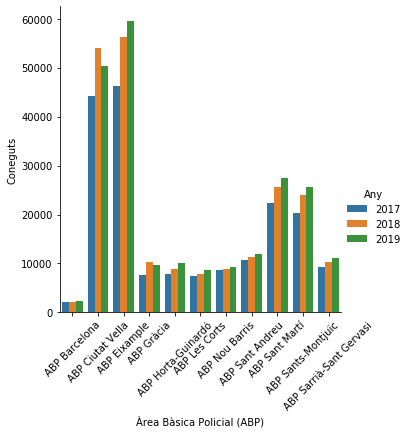

In [84]:
crime_per_neighborhood_2017_2019 = crime_per_neighborhood[(crime_per_neighborhood['Any'] == 2019) | (crime_per_neighborhood['Any'] == 2018) | (crime_per_neighborhood['Any'] == 2017)]


# Draw a nested barplot to show survival for class and sex
plt.figure(figsize=(28,6))
sns.catplot(x="Àrea Bàsica Policial (ABP)", y="Coneguts", hue="Any", data=crime_per_neighborhood_2017_2019, kind="bar")
plt.xticks(rotation=45)

Though the increase exists, it is not significative compared to last year's increase.

## Crime evolution per type of crime in the last 3 years

Try to see if crimes become more violent

In [85]:
violent_crimes = ['Homicidi consumat', 'Homicidi temptativa', 'Lesions', 'Robatori amb força', 'Robatori amb força interior vehicle',
'Robatori amb violència i/o intimidació', 'Abusos sexuals', 'Agressions sexuals', 'Assassinat consumat', 'Segrest', 'Assassinat temptativa', 'Tortures'] 

violent_crimes_evolution = all_crime_barcelona_original.copy()

In [86]:
violent_crimes_evolution = violent_crimes_evolution[violent_crimes_evolution[violent_crimes]]

KeyError: "None of [Index(['Homicidi consumat', 'Homicidi temptativa', 'Lesions',\n       'Robatori amb força', 'Robatori amb força interior vehicle',\n       'Robatori amb violència i/o intimidació', 'Abusos sexuals',\n       'Agressions sexuals', 'Assassinat consumat', 'Segrest',\n       'Assassinat temptativa', 'Tortures'],\n      dtype='object')] are in the [columns]"